# Diabetes Prediction

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Data

In [16]:
data = pd.read_csv(r'data/data.csv')
data.diabetes = data.diabetes.replace({0:'Negetive', 1:'Positive'})
data.head()

,Unnamed: 0,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,0,316,2,112,68,22,94,34.1,0.315,26,Negetive
1,1,25,11,143,94,33,146,36.6,0.254,51,Positive
2,2,710,2,93,64,32,160,38.0,0.674,23,Positive
3,3,658,1,120,80,48,200,38.9,1.162,41,Negetive
4,4,542,3,128,72,25,190,32.4,0.549,27,Positive


In [17]:
data.drop(columns=['Unnamed: 0', 'p_id'], inplace=True)

In [18]:
data.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,Negetive
1,11,143,94,33,146,36.6,0.254,51,Positive
2,2,93,64,32,160,38.0,0.674,23,Positive
3,1,120,80,48,200,38.9,1.162,41,Negetive
4,3,128,72,25,190,32.4,0.549,27,Positive


# Inspecting Data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_times_pregnant      614 non-null    int64  
 1   glucose_concentration  614 non-null    int64  
 2   blood_pressure         614 non-null    int64  
 3   skin_fold_thickness    614 non-null    int64  
 4   serum_insulin          614 non-null    int64  
 5   bmi                    614 non-null    float64
 6   diabetes pedigree      614 non-null    float64
 7   age                    614 non-null    int64  
 8   diabetes               614 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 43.3+ KB


# EDA

In [20]:
sns.set_style('darkgrid')

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_times_pregnant,614.0,3.853420,3.358126,0.000,1.00000,3.000,6.0000,17.00
glucose_concentration,614.0,120.542345,31.252286,0.000,99.00000,117.000,139.0000,197.00
blood_pressure,614.0,68.765472,19.914836,0.000,62.00000,72.000,80.0000,114.00
skin_fold_thickness,614.0,20.244300,15.886083,0.000,0.00000,23.000,32.0000,63.00
serum_insulin,614.0,79.355049,117.709950,0.000,0.00000,17.000,126.0000,846.00
bmi,614.0,31.909935,8.007699,0.000,27.30000,32.000,36.6000,59.40
diabetes pedigree,614.0,0.466342,0.331090,0.078,0.24025,0.361,0.6135,2.42
age,614.0,33.325733,11.929569,21.000,24.00000,29.000,41.0000,81.00


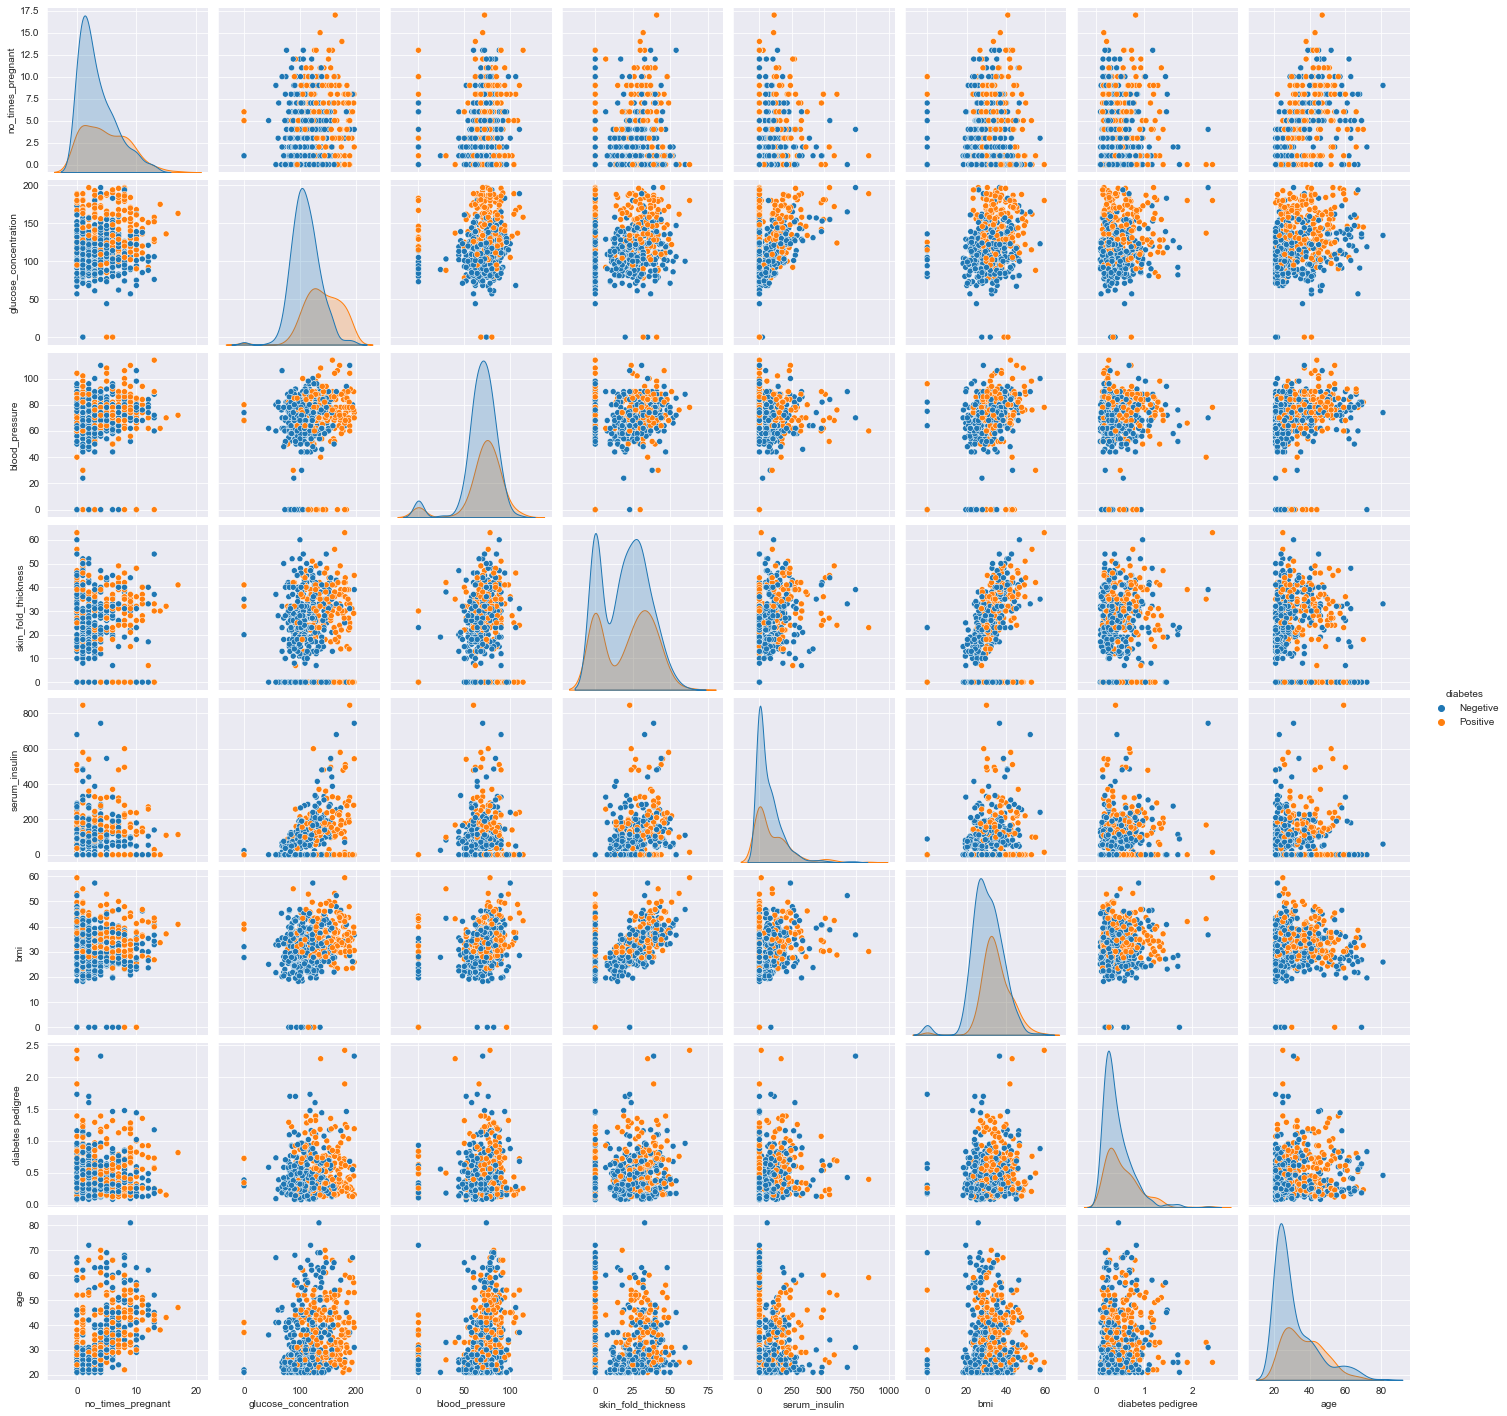

In [22]:
sns.pairplot(data, hue='diabetes')

In [23]:
data.diabetes.value_counts()

Negetive    400
Positive    214
Name: diabetes, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.diabetes = encoder.fit_transform(data.diabetes)
data.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


In [25]:
fetures = data.drop(columns=['diabetes'])
target = data[['diabetes']]

# Balancing Dataset

In [26]:
! pip install imblearn

You should consider upgrading via the 'C:\Python3.9\python.exe -m pip install --upgrade pip' command.


In [27]:
from imblearn.under_sampling import NearMiss

In [28]:
nm = NearMiss()
b_features, b_target = nm.fit_resample(fetures, target)
b_target.value_counts()


diabetes
0           214
1           214
dtype: int64

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(b_features)
scaled_features = pd.DataFrame(scaled_features)
scaled_features.columns = b_features.columns
scaled_features.head()


,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,1.649685,1.161042,0.682712,-1.152156,-0.583557,-0.741861,-0.850748,1.637050
1,0.214010,0.014264,0.482540,-1.152156,-0.583557,0.250378,-0.962914,0.867285
2,-0.073126,0.014264,-0.017889,-1.152156,-0.583557,0.207237,-0.493588,-0.928834
3,-0.647396,0.047993,0.682712,-1.152156,-0.583557,-0.698720,-0.549671,-0.672246
4,0.788280,0.182908,0.682712,-1.152156,-0.583557,1.055673,0.666444,0.183049


In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain , ytest = train_test_split(
    scaled_features, b_target, test_size=0.25, random_state=42
)

# Feature Selection

In [31]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
scorer = mutual_info_classif(scaled_features, b_target.values.ravel())
scorer

array([0.        , 0.09568355, 0.01978523, 0.05746653, 0.02844627,
       0.08655334, 0.03541862, 0.04548731])

In [32]:
selector = SelectKBest(
    mutual_info_classif, k=7
)
selector.fit(scaled_features, b_target.values.ravel())
best_features = selector.get_feature_names_out()
best_features

array(['no_times_pregnant', 'glucose_concentration',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'], dtype=object)

# Modeling

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain[best_features], ytrain.values.ravel())
ypred = model.predict(xtest[best_features])
ypred == ytest.values.ravel()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

# Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(ytest.values.ravel(), ypred), accuracy_score(
    ytest.values.ravel(), ypred)


(array([[51,  9],
        [15, 32]], dtype=int64),
 0.7757009345794392)

# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model, 
    param_grid={
        'n_neighbors': [5,7,9,11,15,19,21],
        'metric': ['euclidean', 'manhattan'], 
        'weights': ['uniform', 'distance']
    }, cv=10, scoring='accuracy',error_score='raise'
)
grid.fit(scaled_features[best_features], b_target.values.ravel())

GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 15, 19, 21],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [37]:
model2 = grid.best_estimator_
ypred = model2.predict(xtest[best_features])
confusion_matrix(ytest.values.ravel(), ypred), accuracy_score(
    ytest.values.ravel(), ypred)


(array([[60,  0],
        [ 0, 47]], dtype=int64),
 1.0)

# Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model2, scaled_features[best_features], b_target.values.ravel())
cv, cv.mean()

(array([0.58139535, 0.72093023, 0.69767442, 0.75294118, 0.72941176]),
 0.6964705882352942)